In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('data/bank-additional-full-preprocessed.csv')

data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F



# Create a model class that inherits nn module
class Model(nn.Module):
    def __init__(self,in_features=19,h1=25,h2=26,h3=30,out_features=2):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.fc3 = nn.Linear(h2,h3)
        self.out = nn.Linear(h3,out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)

        return x



In [33]:
# pick a manual seed for randomization
torch.manual_seed(42)

# create instance of model
model = Model()

__Normalizing Numerical Columns__

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

numerical_columns = [
    'age',
    'campaign',
    'pdays',
    'previous',
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed'
]

# Normalize the columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print(data)

            age  job  marital  education  default  housing  loan  contact  \
0      0.481481    3        1          0        0        0     0        1   
1      0.493827    7        1          3        1        0     0        1   
2      0.246914    7        1          3        0        2     0        1   
3      0.283951    0        1          1        0        0     0        1   
4      0.481481    7        1          3        0        0     2        1   
...         ...  ...      ...        ...      ...      ...   ...      ...   
41183  0.691358    5        1          5        0        2     0        0   
41184  0.358025    1        1          5        0        0     0        0   
41185  0.481481    5        1          6        0        2     0        0   
41186  0.333333    9        1          5        0        0     0        0   
41187  0.703704    5        1          5        0        2     0        0   

       month  day_of_week  campaign  pdays  previous  poutcome  emp.var.rat

In [35]:
# Train test Split

y = data['y']
X = data.drop(columns=['y'])

# Convert to numpy arrays
X = X.values
y = y.values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y features to float tensors
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [38]:
# Set the criterion to measure the error
criterion = nn.CrossEntropyLoss()

# Choose Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [39]:
# Train model

# Determining Epochs
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)

    # Ensure y_train is the correct type for classification
    y_train = y_train.long()

    # measure the loss
    loss = criterion(y_pred, y_train)

    # track loss
    losses.append(loss.detach().numpy())

    # print every 10 epochs
    if i % 10 ==0:
        print(f'Epoch {i} Loss: {loss}')

    # back propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0 Loss: 0.7465928196907043
Epoch 10 Loss: 0.36070236563682556
Epoch 20 Loss: 0.34076783061027527
Epoch 30 Loss: 0.31546977162361145
Epoch 40 Loss: 0.3054366707801819
Epoch 50 Loss: 0.29861196875572205
Epoch 60 Loss: 0.2941061556339264
Epoch 70 Loss: 0.2910465896129608
Epoch 80 Loss: 0.28865841031074524
Epoch 90 Loss: 0.28660717606544495


Text(0.5, 0, 'epoch')

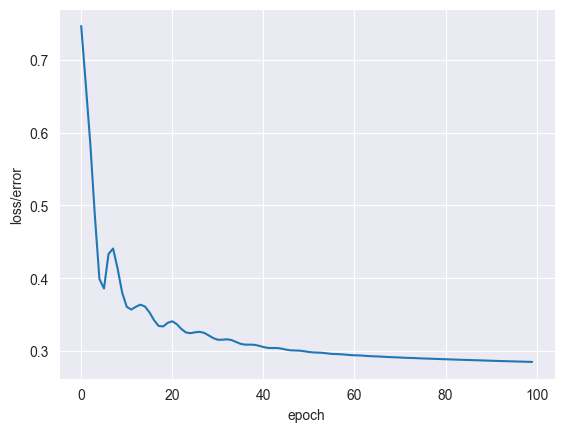

In [40]:
# Visualizing error
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel("epoch")

In [41]:
# Evaluating model on test data
with torch.no_grad():
    y_eval = model.forward(X_test)

    # Ensure y_test is the correct type for classification
    y_test = y_test.long()

    loss = criterion(y_eval, y_test)

In [42]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        print(f"{i+1}.) {str(y_val)} \t {y_test[i]}")

        # Getting correct value
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f"We got {correct} correct")

1.) tensor([ 0.6166, -1.3642]) 	 0
2.) tensor([ 1.0199, -2.3616]) 	 0
3.) tensor([ 0.6912, -1.5490]) 	 0
4.) tensor([ 0.9845, -2.3272]) 	 0
5.) tensor([ 0.8966, -2.1092]) 	 0
6.) tensor([ 0.8310, -1.9283]) 	 0
7.) tensor([ 1.0111, -2.3795]) 	 0
8.) tensor([ 1.0187, -2.3016]) 	 0
9.) tensor([ 0.9613, -2.2013]) 	 0
10.) tensor([ 0.8536, -2.0273]) 	 0
11.) tensor([ 0.5817, -1.2115]) 	 0
12.) tensor([ 0.5779, -1.2558]) 	 0
13.) tensor([ 0.8513, -1.9539]) 	 1
14.) tensor([ 0.7779, -1.6044]) 	 1
15.) tensor([ 0.7938, -1.9219]) 	 0
16.) tensor([ 0.9785, -2.3220]) 	 0
17.) tensor([ 0.9782, -2.3213]) 	 0
18.) tensor([ 0.8486, -1.9904]) 	 0
19.) tensor([ 0.8674, -1.9845]) 	 0
20.) tensor([ 0.3431, -0.5065]) 	 1
21.) tensor([ 0.9355, -2.2313]) 	 1
22.) tensor([ 1.0293, -2.4382]) 	 0
23.) tensor([ 1.0420, -2.5847]) 	 1
24.) tensor([ 0.8261, -1.9032]) 	 0
25.) tensor([ 0.8108, -1.8204]) 	 0
26.) tensor([ 0.5395, -1.0760]) 	 0
27.) tensor([ 0.6003, -1.2331]) 	 0
28.) tensor([ 0.9046, -1.9988]) 	 0
2